#**Muskan Jain**
#**015034**
#**Project 2**

In [1]:
import os  
import time

In [2]:
# Installs pyspark, spark-nlp and findspark

!wget http://setup.johnsnowlabs.com/colab.sh -O - | bash

--2021-12-24 11:55:06--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2021-12-24 11:55:06--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-12-24 11:55:07--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

In [3]:
# To check contents of colab.sh, just download 
#     colab.sh and examine its contents:

!wget http://setup.johnsnowlabs.com/colab.sh 

! cat /content/colab.sh

--2021-12-24 11:55:13--  http://setup.johnsnowlabs.com/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://setup.johnsnowlabs.com/colab.sh [following]
--2021-12-24 11:55:14--  https://setup.johnsnowlabs.com/colab.sh
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh [following]
--2021-12-24 11:55:14--  https://raw.githubusercontent.com/JohnSnowLabs/spark-nlp/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:44

In [29]:
# Call libraries
import pandas as pd
import numpy as np

# spark related
from pyspark.ml import Pipeline
from pyspark.sql import SparkSession
import pyspark.sql.functions as f
from pyspark.sql.types import DoubleType, StringType,StructField,StructType
#Replace part of string with another string
from pyspark.sql.functions import regexp_replace

# Spark-nlp related
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *

#importing all the tools which will be required in data prepretion and creating layers 
from pyspark.ml.feature import StringIndexer , OneHotEncoder
from pyspark.ml.feature import MinMaxScaler , StandardScaler , VectorAssembler

#importing the LinearRegression Model and crossValidator for model tunning.
from pyspark.ml.regression import LinearRegression
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

from pyspark.sql.functions import isnan,when,count,col
# Get spark in sys.path
import findspark

from pyspark.sql.functions import col, explode
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
# Create Spark session and start sparknlp

spark = sparknlp.start()

In [31]:
# Show multiple command outputs from a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
def ssh_install():
  print("\n--1. Download and install ssh server----\n")
  ! sudo apt-get remove openssh-client openssh-server
  ! sudo apt install openssh-client openssh-server
  
  print("\n--2. Restart ssh server----\n")
  ! service ssh restart

In [33]:
def install_java():
  ! rm -rf /usr/java

  print("\n--Download and install Java 8----\n")
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null        # install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     # set environment variable

  !update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
  !update-alternatives --set javac /usr/lib/jvm/java-8-openjdk-amd64/bin/javac
  
  !mkdir -p /usr/java
  ! ln -s "/usr/lib/jvm/java-8-openjdk-amd64"  "/usr/java"
  ! mv "/usr/java/java-8-openjdk-amd64"  "/usr/java/latest"
  
  !java -version       #check java version
  !javac -version

In [34]:
def set_keys():
  print("\n---22. Generate SSH keys----\n")
  ! cd ~ ; pwd 
  ! cd ~ ; ssh-keygen -t rsa -P '' -f ~/.ssh/id_rsa
  ! cd ~ ; cat ~/.ssh/id_rsa.pub >> ~/.ssh/authorized_keys
  ! cd ~ ; chmod 0600 ~/.ssh/authorized_keys

In [35]:
def set_env():
  print("\n---23. Set Environment variables----\n")
  # 'export' command does not work in colab
  # https://stackoverflow.com/a/57240319
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre"

In [36]:
# Function to call all functions
def install_components():
  print("\n--Install java----\n")
  ssh_install()
  install_java()  
  #set_keys()
  set_env()

In [37]:
start = time.time()
install_components()
end = time.time()
print("\n---Time taken----\n")
print((end- start)/60)


--Install java----


--1. Download and install ssh server----

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  ncurses-term python3-certifi python3-chardet python3-idna
  python3-pkg-resources python3-requests python3-six python3-urllib3
Use 'sudo apt autoremove' to remove them.
The following packages will be REMOVED:
  openssh-client openssh-server openssh-sftp-server ssh-import-id
0 upgraded, 0 newly installed, 4 to remove and 37 not upgraded.
After this operation, 5,240 kB disk space will be freed.
(Reading database ... 158234 files and directories currently installed.)
Removing openssh-server (1:7.6p1-4ubuntu0.5) ...
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of stop.
Removing ssh-import-id (5.7-0ubuntu1.1) ...
Removing openssh-sftp-server (1:7.6p1-4ubuntu0.5) ...
Removing openssh-client (1:7.6p1-4ubuntu0

In [38]:
def spark_koalas_install():
  print("\n--1.1 Install findspark----\n")
  !pip install -q findspark

  print("\n--1.2 Install databricks Koalas----\n")
  !pip install koalas

  print("\n--1.3 Download Spark Apache tar.gz----\n")
  #! wget -c https://apachemirror.wuchna.com/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
  ! wget -c https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz 

  print("\n--1.4 Transfer downloaded content and unzip tar.gz----\n")
  !  mv /content/spark*   /opt/
  ! tar -xzf /opt/spark-3.1.2-bin-hadoop3.2.tgz  --directory /opt/

  print("\n--1.5 Check folder for files----\n")
  ! ls -la /opt

In [39]:
def set_spark_env():
  print("\n---2. Set Environment variables----\n")
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64" 
  os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre" 
  os.environ["SPARK_HOME"] = "/opt/spark-3.1.2-bin-hadoop3.2"     
  os.environ["LD_LIBRARY_PATH"] += ":/opt/spark-3.1.2-bin-hadoop3.2/lib/native"
  os.environ["PATH"] += ":/opt/spark-3.1.2-bin-hadoop3.2/bin:/opt/spark-3.1.2-bin-hadoop3.2/sbin"
  print("\n---2.1. Check Environment variables----\n")
  # Check
  ! echo $PATH
  ! echo $LD_LIBRARY_PATH

In [40]:
def spark_conf():
  print("\n---3. Configure spark to access hadoop----\n")
  !mv /opt/spark-3.1.2-bin-hadoop3.2/conf/spark-env.sh.template  /opt/spark-3.1.2-bin-hadoop3.2/conf/spark-env.sh
  #!echo "HADOOP_CONF_DIR=/opt/hadoop-3.2.2/etc/hadoop/" >> /opt/spark-3.1.2-bin-hadoop3.2/conf/spark-env.sh
  print("\n---3.1 Check ----\n")
  #!cat /opt/spark-3.1.1-bin-hadoop3.2/conf/spark-env.sh

In [41]:
def install_spark():
  spark_koalas_install()
  set_spark_env()
  spark_conf()


In [42]:
install_spark()


--1.1 Install findspark----


--1.2 Install databricks Koalas----


--1.3 Download Spark Apache tar.gz----

--2021-12-24 12:00:23--  https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz’

spark-3.1.2-bin-had 100%[===================>] 218.23M   137MB/s    in 1.6s    

2021-12-24 12:00:24 (137 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz’ saved [228834641/228834641]


--1.4 Transfer downloaded content and unzip tar.gz----


--1.5 Check folder for files----

total 223492
drwxr-xr-x  1 root root      4096 Dec 24 12:00 .
drwxr-xr-x  1 root root      4096 Dec 24 10:19 ..
drwxr-xr-x  1 root root      4096 Dec  3 14:27 google
drwxr-xr-x  4 root root      4096 Dec  3 14:20 nvidia
drwxr-x

In [43]:
from google.colab import drive
drive.mount('/gdrive')


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [44]:
# Creating a Spark Session
spark = SparkSession.builder.master('local[3]').appName('BankNoteAuthentication').getOrCreate()

In [45]:
#Reading the CSV file
df = spark.read.csv(path = "/gdrive/MyDrive/BankNote_Authentication.csv",
                        header=True,
                        inferSchema = True)

In [46]:
df.show(5)

+--------+--------+--------+--------+-----+
|variance|skewness|curtosis| entropy|class|
+--------+--------+--------+--------+-----+
|  3.6216|  8.6661| -2.8073|-0.44699|    0|
|  4.5459|  8.1674| -2.4586| -1.4621|    0|
|   3.866| -2.6383|  1.9242| 0.10645|    0|
|  3.4566|  9.5228| -4.0112| -3.5944|    0|
| 0.32924| -4.4552|  4.5718| -0.9888|    0|
+--------+--------+--------+--------+-----+
only showing top 5 rows



As shown above, we have 5 columns of which the last column is the target class

In [47]:
#data type in each columns 
df.printSchema()

root
 |-- variance: double (nullable = true)
 |-- skewness: double (nullable = true)
 |-- curtosis: double (nullable = true)
 |-- entropy: double (nullable = true)
 |-- class: integer (nullable = true)



Searching for null values in df

In [48]:
#checking null value in each columns with the help of a loop
def get_null_value_count(data):
    data.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in data.columns]).show()

In [49]:
#NO null value in any culumns. 
get_null_value_count(df)

+--------+--------+--------+-------+-----+
|variance|skewness|curtosis|entropy|class|
+--------+--------+--------+-------+-----+
|       0|       0|       0|      0|    0|
+--------+--------+--------+-------+-----+



In [50]:
print("(",df.count(),",",len(df.columns),")")

( 1372 , 5 )


Let's visualize a pairplot for better understanding

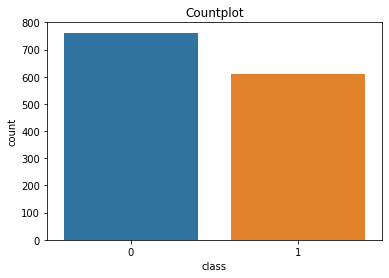

In [51]:
data = df.select('class').toPandas()
sns.countplot(data=data,x='class')
_=plt.title("Countplot")

Text(0.5, 1.0, 'variance')

Text(0.5, 1.0, 'skewness')

Text(0.5, 1.0, 'curtosis')

Text(0.5, 1.0, 'entropy')

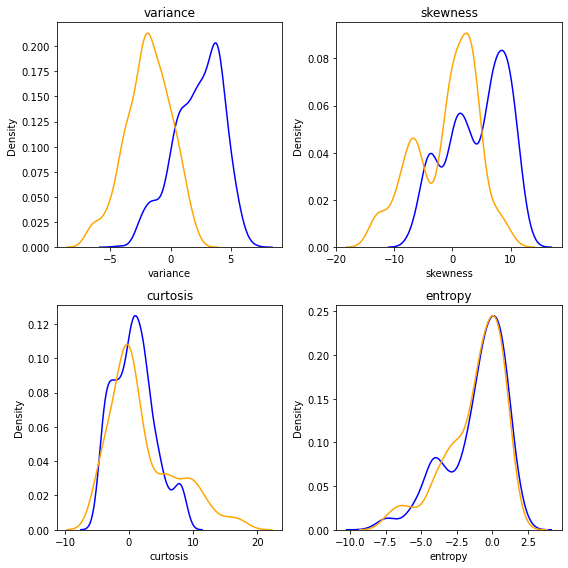

In [52]:
#Seperating the dataset according to class for easy plotting
data_0=df.where(f.col("class")==0)
data_1=df.where(f.col("class")==1)

#KDE plots
cols = df.columns
cols.remove('class')
fig,ax =plt.subplots(2,2,figsize=(8,8))
for feature,axes in zip(cols,ax.ravel()):
    sns.kdeplot(data_0.select(feature).toPandas()[feature],color='blue',ax=axes)
    sns.kdeplot(data_1.select(feature).toPandas()[feature],color='orange',ax=axes)
    axes.set_title(feature)
plt.tight_layout()

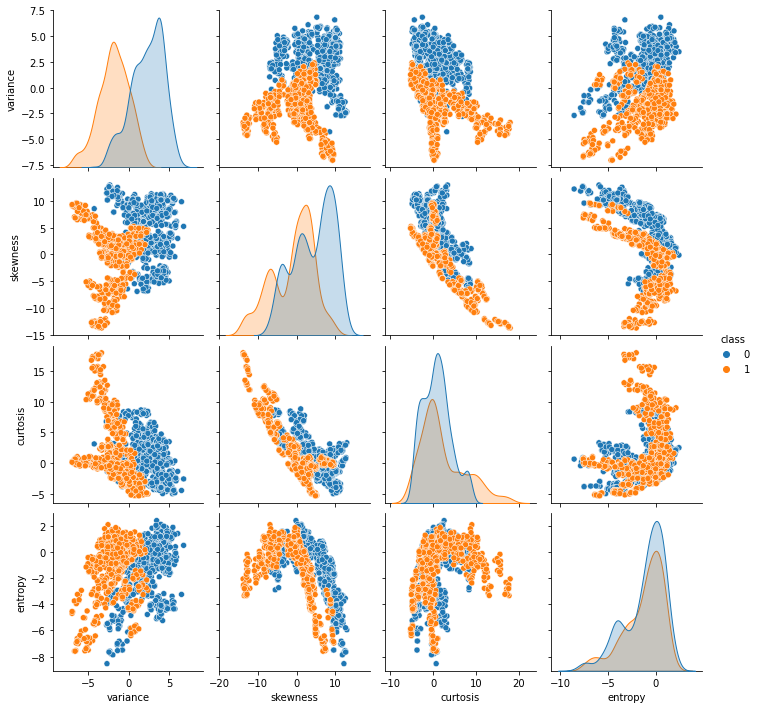

In [53]:

data = df.toPandas()
sns.pairplot(data=data,hue='class')

In [54]:
#displaying the dataframe
df.show(3)

+--------+--------+--------+--------+-----+
|variance|skewness|curtosis| entropy|class|
+--------+--------+--------+--------+-----+
|  3.6216|  8.6661| -2.8073|-0.44699|    0|
|  4.5459|  8.1674| -2.4586| -1.4621|    0|
|   3.866| -2.6383|  1.9242| 0.10645|    0|
+--------+--------+--------+--------+-----+
only showing top 3 rows



Let's create the Feature column using VectorAssembler

In [55]:
#Import VectorAssembler
from pyspark.ml.feature import VectorAssembler

In [56]:
#'cols' is the list of feature names that we have
print(cols)

['variance', 'skewness', 'curtosis', 'entropy']


In [57]:
VecAssembler = VectorAssembler(inputCols=cols,outputCol="features")
#A demo of the output of vector assembler. Later we will assemble all feature transformations in a single pipeline
VecAssembler.transform(df).select("features","class").show(3)

+--------------------+-----+
|            features|class|
+--------------------+-----+
|[3.6216,8.6661,-2...|    0|
|[4.5459,8.1674,-2...|    0|
|[3.866,-2.6383,1....|    0|
+--------------------+-----+
only showing top 3 rows



Note that we have a features and a class column now
Let's use the randomSplit method to split the dataframe to train and test sets

In [58]:
#let's choose 0.8 as the training split length, because we have only a few rows of data
train,test = df.randomSplit([0.8,0.2])

Earlier we saw in the KDE graphs that the features were nearly following a normal distribution. Hence let' use a StandardScaler to scale the features

In [59]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline

In [60]:
#specify input col and output col and fit the scaler
scaler = StandardScaler(inputCol="features",outputCol="features_scaled")

#transform the datasets using a pipeline
feature_pipe = Pipeline(stages=[VecAssembler,scaler]).fit(train)
train = feature_pipe.transform(train)
test = feature_pipe.transform(test)

In [61]:
train.select("features","features_scaled").show(3)

+--------------------+--------------------+
|            features|     features_scaled|
+--------------------+--------------------+
|[-7.0364,9.2931,0...|[-2.5092236695032...|
|[-6.9599,8.9931,0...|[-2.4819432973360...|
|[-6.7526,8.8172,-...|[-2.4080188378556...|
+--------------------+--------------------+
only showing top 3 rows



In [62]:
from pyspark.ml.feature import PCA
from pyspark.ml.functions import vector_to_array

In [63]:
# PCA decmposition to 2 features
pca = PCA(k=3,inputCol="features",outputCol="pca").fit(train)
data = pca.transform(train).select("pca","class")
data.show(3)

21/12/24 12:01:33 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
21/12/24 12:01:33 WARN BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
21/12/24 12:01:33 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
21/12/24 12:01:33 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


+--------------------+-----+
|                 pca|class|
+--------------------+-----+
|[-7.1219350783910...|    1|
|[-6.8658519041403...|    1|
|[-6.7793537330021...|    1|
+--------------------+-----+
only showing top 3 rows



Now the vectors in 'pca' column has to be split to two to plot it

In [64]:
data = data.withColumn("pca",vector_to_array("pca")).select(f.col("class"),f.col("pca")[0],f.col("pca")[1],f.col("pca")[2])
data.show(3)

+-----+------------------+------------------+-------------------+
|class|            pca[0]|            pca[1]|             pca[2]|
+-----+------------------+------------------+-------------------+
|    1|-7.121935078391025|-10.15750655446616|-1.2039181958517606|
|    1|-6.865851904140367|-10.04683880955562|-1.1368664719614738|
|    1|-6.779353733002185|-9.374133736722074| -0.969285678066517|
+-----+------------------+------------------+-------------------+
only showing top 3 rows



In [65]:
data = data.toPandas()

In [66]:
#plotting
fig = px.scatter_3d(data, x='pca[0]', y='pca[1]', z='pca[2]',color='class',title="3D Scatterplot of PCA Features",color_continuous_scale=px.colors.sequential.Viridis)
fig.update(layout_coloraxis_showscale=False)
fig.show()

Using PCA, we tried to reduce the number of features to 3 from 4, so that they can be visualized. As you can see, there is an excellent separation between both the classes. Let's use Logistic Classifier or Support Vector Classifier for making the model

In [67]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

In [68]:
lr = LogisticRegression(featuresCol="features",labelCol="class",predictionCol='prediction_lr')
params = ParamGridBuilder().addGrid(lr.maxIter,[50,75,100,150,200]).addGrid(lr.regParam,[0,0.0001,0.001,0.01,0.1,0.5]).build()

evaluator = MulticlassClassificationEvaluator(predictionCol='prediction_lr',labelCol='class',metricName='f1')
CValidator = CrossValidator(estimator=lr,estimatorParamMaps=params,evaluator=evaluator,numFolds=5)
CValidator_lr = CValidator.fit(train)

#predictions on test data
predictions_lr= CValidator_lr.transform(test).select('prediction_lr','class')
predictions_lr.show(3)

+-------------+-----+
|prediction_lr|class|
+-------------+-----+
|          1.0|    1|
|          1.0|    1|
|          1.0|    1|
+-------------+-----+
only showing top 3 rows



'class' is the original label, 'prediciton' is the predicted label and 'features_scaled' represent the scaled features

Let's plot the ROC curve and print the area under it

Area under the ROC curve: 0.9998
F1 Score: 0.9807


MulticlassClassificationEvaluator_96469a509452

Accuracy: 0.9807


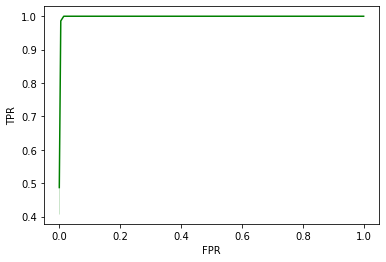

In [69]:
data = CValidator_lr.bestModel.summary.roc.toPandas()
sns.lineplot(data=data,x='FPR',y='TPR',color='green')
print("Area under the ROC curve:",format(CValidator_lr.bestModel.summary.areaUnderROC,'.4f'))
print("F1 Score:",format(evaluator.evaluate(predictions_lr),'.4f'))
evaluator.setMetricName('accuracy')
print("Accuracy:",format(evaluator.evaluate(predictions_lr),'.4f'))

In [70]:
from pyspark.ml.classification import LinearSVC

In [71]:
svc = LinearSVC(featuresCol='features_scaled',labelCol='class',predictionCol='prediction_svc')
params = ParamGridBuilder().addGrid(svc.maxIter,[50,100,200]).addGrid(svc.regParam,[0,0.001,1]).build()
evaluator.setPredictionCol('prediction_svc')
evaluator.setMetricName('f1')

CValidator_svc = CrossValidator(estimator=svc,estimatorParamMaps=params,evaluator=evaluator).fit(train)

MulticlassClassificationEvaluator_96469a509452

MulticlassClassificationEvaluator_96469a509452

21/12/24 12:04:51 ERROR OWLQN: Failure! Resetting history: breeze.optimize.NaNHistory: 
21/12/24 12:04:55 ERROR OWLQN: Failure! Resetting history: breeze.optimize.NaNHistory: 
21/12/24 12:06:46 ERROR OWLQN: Failure! Resetting history: breeze.optimize.NaNHistory: 
21/12/24 12:06:48 ERROR OWLQN: Failure! Resetting history: breeze.optimize.NaNHistory: 
21/12/24 12:06:48 ERROR OWLQN: Failure! Resetting history: breeze.optimize.NaNHistory: 


In [72]:
predictions_svc = CValidator_svc.transform(test).select("prediction_svc","class")

In [73]:
print("f1 Score",format(evaluator.evaluate(predictions_svc),'.4f'))
evaluator.setMetricName('accuracy')
print("Accuracy score: ",format(evaluator.evaluate(predictions_svc),'.4f'))

f1 Score 0.9769


MulticlassClassificationEvaluator_96469a509452

Accuracy score:  0.9768


In [74]:
#Save feature pipe

feature_pipe.write().overwrite().save('feature_pipe')

#Save the model

CValidator_svc.bestModel.write().overwrite().save('bank_note_model_svc')

#Deployment using StreamLit Library

In [58]:
!pip -q install streamlit

     |████████████████████████████████| 9.2 MB 18.6 MB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 164 kB 69.5 MB/s 
     |████████████████████████████████| 4.3 MB 57.4 MB/s 
     |████████████████████████████████| 180 kB 63.0 MB/s 
     |████████████████████████████████| 111 kB 56.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 126 kB 45.2 MB/s 
     |████████████████████████████████| 791 kB 48.9 MB/s 
     |████████████████████████████████| 374 kB 53.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.24 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.6.0 which is incompatible.
google-colab 1.0.0 requires ipyth

In [59]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import LinearSVCModel
from pyspark.ml.pipeline import PipelineModel

In [60]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15984 sha256=c78adc173f3f11e0e949cb898eaa7e53ed2f89831856bfefd73eef6209bc88a3
  Stored in directory: /root/.cache/pip/wheels/b1/d9/12/045a042fee3127dc40ba6f5df2798aa2df38c414bf533ca765
Successfully built pyngrok


In [64]:
%%writefile money-predicting-app.py
import streamlit as st

Overwriting money-predicting-app.py


In [70]:
!pip install ipykernel>=5.1.2
!pip install pydeck

In [73]:
!pip install python_version>="3.4"
#('ipykernel>=5.1.2; python_version >= "3.4"'), {'pydeck'}))

In [74]:
import streamlit as st

ContextualVersionConflict: ignored

In [75]:
#heading
st.write('''# Simple Application for predicting the authenticity of Bank Notes''')

NameError: ignored

In [ ]:
uploaded_file=st.sidebar.file_uploader( 
    label="upload your bank note picture",
    type=["jpg","png","jpeg"])

In [ ]:
#Load feature_pipe and model

feature_pipe = PipelineModel.load('feature_pipe')
model = LinearSVCModel.load('bank_note_model_svc')
spark = SparkSession.builder.master('local').appName('deployPyspark').getOrCreate()

def predict(variance,skewness,curtosis,entropy,spark):
    schema = "variance FLOAT, skewness FLOAT, curtosis FLOAT, entropy FLOAT"
    data = spark.createDataFrame([[variance,skewness,curtosis,entropy]],schema=schema)
    data = feature_pipe.transform(data)
    prediction = model.transform(data).select("prediction_svc").collect()[0][0]
    return "Fake Note" if(prediction) else "Authentic Note"
    
def noteAuth():
    st.title("Bank Note Authentication")
    st.markdown("Application for predicting the authenticity of Bank Notes")

    variance = float(st.text_input("Variance", 3.6216))
    skewness = float(st.text_input("Skewness",8.6661))
    curtosis = float(st.text_input("Curtosis",-2.8073))
    entropy = float(st.text_input("Entropy",-0.44699))

    if(st.button("Predict")):
        result = predict(variance,skewness,curtosis,entropy,spark)
        st.success(f"Prediction: {result}")

if __name__ == '__main__':
    noteAuth()

In [ ]:
!streamlit run /content/app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...

Error: Invalid value: File does not exist: /content/app.py


In [76]:
spark.stop()

In [ ]:
####### Project 2 is done #########